#Importing dependencies

In [0]:
from fastai import *
from fastai.vision import *

#Dataset Preparation

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Memes1/"
path = Path(root_dir)
path.ls()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


[PosixPath('/content/gdrive/My Drive/Memes1/Meme'),
 PosixPath('/content/gdrive/My Drive/Memes1/Quote'),
 PosixPath('/content/gdrive/My Drive/Memes1/Film-Poster'),
 PosixPath('/content/gdrive/My Drive/Memes1/models'),
 PosixPath('/content/gdrive/My Drive/Memes1/export.pkl')]

###.txt files containing links of various memes.

In [0]:
folder='Meme'
file='memes.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes1.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes2.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes3.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes4.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes5.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes6.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes7.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes8.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes9.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes10.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes11.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes12.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes13.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes14.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes15.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes16.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes17.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='memes18.txt'
download_images(path/folder/file, path/folder, max_pics=100000)

###.txt files containing links of various quotes.

In [0]:
folder='Quote'
file='quote.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='quote1.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='quote2.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='quote3.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='quote4.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='quote5.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='quote6.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='quote7.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='quote8.txt'
download_images(path/folder/file, path/folder, max_pics=100000)

###.txt files containing links of various Film-Posters.

In [0]:
folder='Film-Poster'
file='poster.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='poster1.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='poster2.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='poster3.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='poster4.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
file='poster5.txt'
download_images(path/folder/file, path/folder, max_pics=100000)
# file='poster6.txt'
# download_images(path/folder/file, path/folder, max_pics=100000)
file='poster7.txt'
download_images(path/folder/file, path/folder, max_pics=100000)

In [0]:
classes = ['Meme','Quote','Film-Poster']

###Cleaning the dataset to have perfect images and deleting various unrecognised images.

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=500, num_workers=4).normalize(imagenet_stats)

In [16]:
data.classes

['Film-Poster', 'Meme', 'Quote']

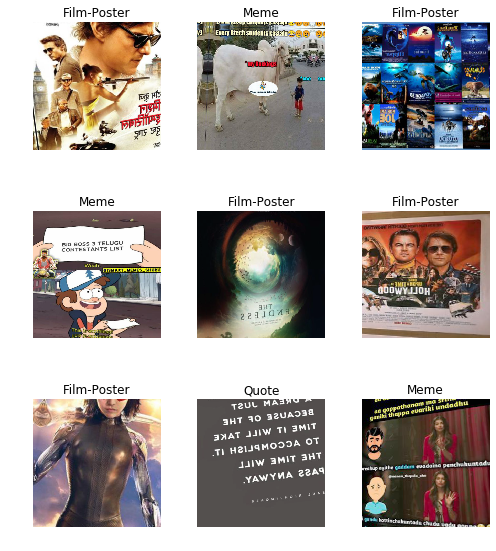

In [17]:
data.show_batch(rows=3, figsize = (7,8))

In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Film-Poster', 'Meme', 'Quote'], 3, 2470, 617)

#Training

In [19]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 68524630.81it/s]


In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.703438,0.384361,0.865478,01:47
1,0.498224,0.335885,0.886548,01:44
2,0.388299,0.311569,0.880065,01:45
3,0.327229,0.312745,0.896272,01:46


In [0]:
 learn.save('stage-1')

In [0]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


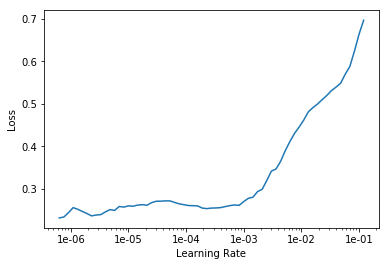

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(12,max_lr=1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.259962,0.294020,0.891410,01:48
1,0.230578,0.295272,0.899514,01:48
2,0.205598,0.265455,0.909238,01:48
3,0.174980,0.297973,0.905997,01:46
4,0.144424,0.276388,0.917342,01:46
5,0.112963,0.276424,0.917342,01:48
6,0.085641,0.259905,0.917342,01:47
7,0.059960,0.250757,0.925446,01:47
8,0.044772,0.251272,0.923825,01:47
9,0.034068,0.254995,0.920583,01:47


In [0]:
learn.save('stage-2')

#Interpretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_top_losses(9, figsize=(7,8))

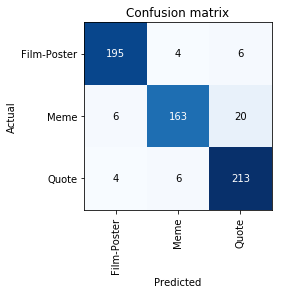

In [28]:
interp.plot_confusion_matrix()

In [29]:
interp.most_confused(min_val=1)

[('Meme', 'Quote', 20),
 ('Film-Poster', 'Quote', 6),
 ('Meme', 'Film-Poster', 6),
 ('Quote', 'Meme', 6),
 ('Film-Poster', 'Meme', 4),
 ('Quote', 'Film-Poster', 4)]

In [0]:
from fastai.widgets import *
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2');
path
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

#Predicting

In [0]:
learn.export()

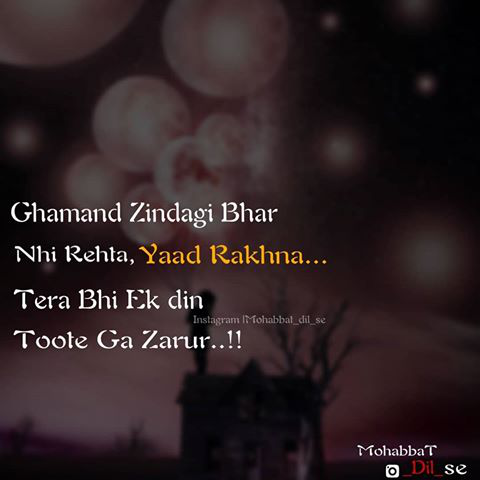

In [32]:
img = open_image('img.jpg')
img


In [33]:
learn = load_learner(path)
pred_class,pred_index,outputs = learn.predict(img)
pred_class

Category Quote

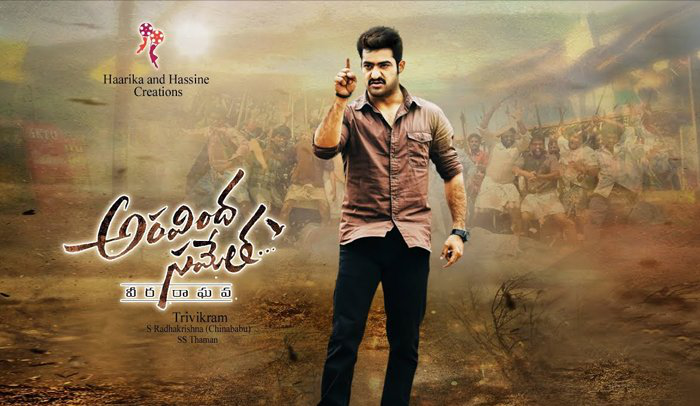

In [34]:
img1 = open_image('img1.jpg')
img1

In [35]:
learn = load_learner(path)
pred_class,pred_index,outputs = learn.predict(img1)
pred_class

Category Film-Poster

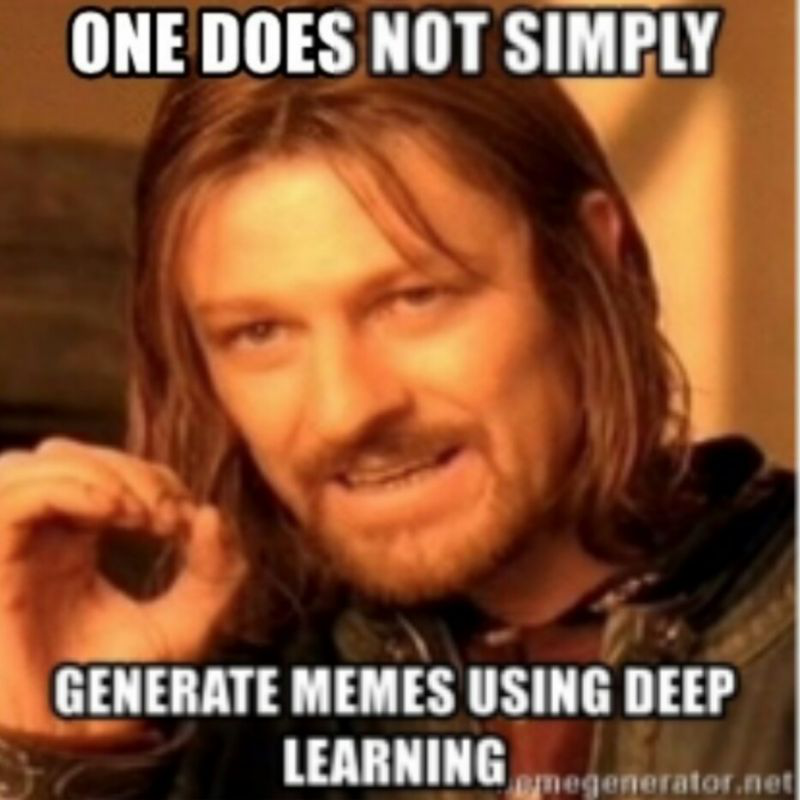

In [37]:
img2 = open_image('img2.jpg')
img2

In [38]:
learn = load_learner(path)
pred_class,pred_index,outputs = learn.predict(img2)
pred_class

Category Meme